# Hypercupe vs Hyperellipsoid

This is a playground file.

Methods for calculating the convex hull are proven to be computationaly expensive. Best case scenario for hypercube vs hypercubiod is demonstrated

In [1]:
import numpy as np
from math import gamma, pi
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time

In [2]:
def getAllSpansEqual(numOfDims, spanForAll):
    return np.ones(numOfDims)*spanForAll

print(getAllSpansEqual(4, 20))

def getRandomUniformSpans(numOfDims, low, high):
    return np.random.rand(numOfDims)*(high-low) + low
    
print( getRandomUniformSpans(4, 10, 60) )

[20. 20. 20. 20.]
[37.32721354 18.56255606 19.80577136 54.06611595]


Equation for the Hypercube:
$$
V\left( x_1, x_2, \dots x_i, \dots x_n \right) = \prod_{i=1}^{n} x_i
$$

In [3]:
def getVolumeHypercube(params):
    # vdims = params.size
    # print(dims)
    return np.prod(params)

print(getVolumeHypercube(getAllSpansEqual(4, 20)))

160000.0


Equation for the n-dimensional sphere of radius x: ( Source: https://www.whitman.edu/documents/Academics/Mathematics/2014/jorgenmd.pdf )

$$
V\left( x \right) = \frac{\pi^{\frac{n}{2}}}{\Gamma \left( \frac{n}{2} + 1 \right)}x^n
$$

Therefore the equation for the n-dimensional Elipsoid is:

$$
V\left( x_1, x_2, \dots x_i, \dots x_n \right) = \frac{\pi^{\frac{n}{2}}}{\Gamma \left( \frac{n}{2} + 1 \right)}\prod_{i=1}^{n} x_i
$$

Where The Gamma function is defined as:
$$
\Gamma \left( x \right) = \int\limits_0^\infty {s^{x - 1} e^{ - s} ds}
$$

In [4]:
def getVolumeElipsoid(params):
    nDims = params.size
    # print(nDims)
    params /= 2
    return pow(pi, (nDims/2)) / gamma(nDims/2 + 1) * np.prod(params)

print(getVolumeElipsoid(getAllSpansEqual(4, 20)))

49348.022005446786


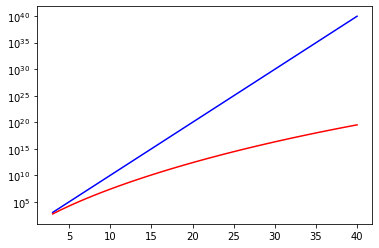

In [5]:
dimensions = np.arange(3,41)
span = 10

volumesHypercube = [getVolumeHypercube(getAllSpansEqual(nDims, span)) for nDims in dimensions]
volumesElipsoid =  [getVolumeElipsoid( getAllSpansEqual(nDims, span)) for nDims in dimensions]

plt.plot( dimensions, volumesHypercube, c="blue")
plt.plot( dimensions, volumesElipsoid,  c="red" )
plt.yscale("log")

plt.show()

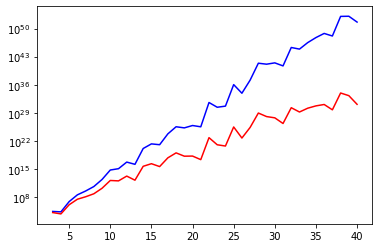

In [6]:
np.random.seed(4206969)

dimensions = np.arange(3,41)
span = 10
low = 5
high = 50

arrayOfSpans = [getRandomUniformSpans(nDims, low, high) for nDims in dimensions]

volumesHypercube = [getVolumeHypercube(spans) for spans in arrayOfSpans]
volumesElipsoid =  [getVolumeElipsoid( spans) for spans in arrayOfSpans]

plt.plot( dimensions, volumesHypercube, c="blue")
plt.plot( dimensions, volumesElipsoid,  c="red" )
plt.yscale("log")

plt.show()

### Using scipy.spatial.ConvexHull

Function documentation is at https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

[21 22 23 24 25 26 27 28 29 30 31 32]
done for nPoints: 21
done for nPoints: 22
done for nPoints: 23
done for nPoints: 24
done for nPoints: 25
done for nPoints: 26
done for nPoints: 27
done for nPoints: 28
done for nPoints: 29
done for nPoints: 30
done for nPoints: 31
done for nPoints: 32


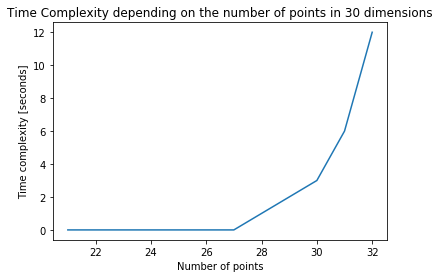

In [8]:
# from scipy.spatial import ConvexHull, convex_hull_plot_2d

# points = np.random.rand(33, 30)   # 30 random points in 2-D
# hull = ConvexHull(points, "Qx")
# print("done")
# print()

nPointsArray = np.arange(21, 33) # <- feel free to increase this if you have the time.
print(nPointsArray)
timeNeeded = nPointsArray.copy()

counter = 0
for nPoints in nPointsArray:
    start = time.time()
    points = np.random.rand( nPoints , 20)   # 30 random points in x-Dimensions
    hull = ConvexHull(points, "Qx")
    end = time.time()
    timeNeeded[counter] = (end-start)
    counter += 1
    print("done for nPoints:", nPoints)
    
plt.title("Time Complexity depending on the number of points in 30 dimensions")
plt.ylabel("Time complexity [seconds]")
plt.xlabel("Number of points")
plt.plot( nPointsArray, timeNeeded )
plt.show()


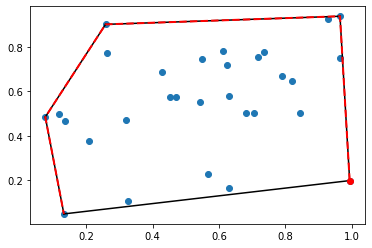

In [8]:
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()